Importing the dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing the BOSTON House price datasets

In [11]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)


In [19]:
#loading the daatasets to our pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [22]:
#printing first 5 rows of dataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
#add the target(price) column to the Dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [25]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
#cheking the number of rows and columns in the dataframe
house_price_dataframe.shape
#rows,col

(20640, 9)

In [28]:
#cheking for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [29]:
#statistical methoda of this dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

1. Positive Correlation : Dark colour


2. Negative Correlation : Light colour

In [30]:
correlation = house_price_dataframe.corr()

In [31]:
print(correlation)

              MedInc  HouseAge  AveRooms  ...  Latitude  Longitude     price
MedInc      1.000000 -0.119034  0.326895  ... -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  ...  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000  ...  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621  ...  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  ... -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  ...  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389  ...  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540  ... -0.924664   1.000000 -0.045967
price       0.688075  0.105623  0.151948  ... -0.144160  -0.045967  1.000000

[9 rows x 9 columns]


<Axes: >

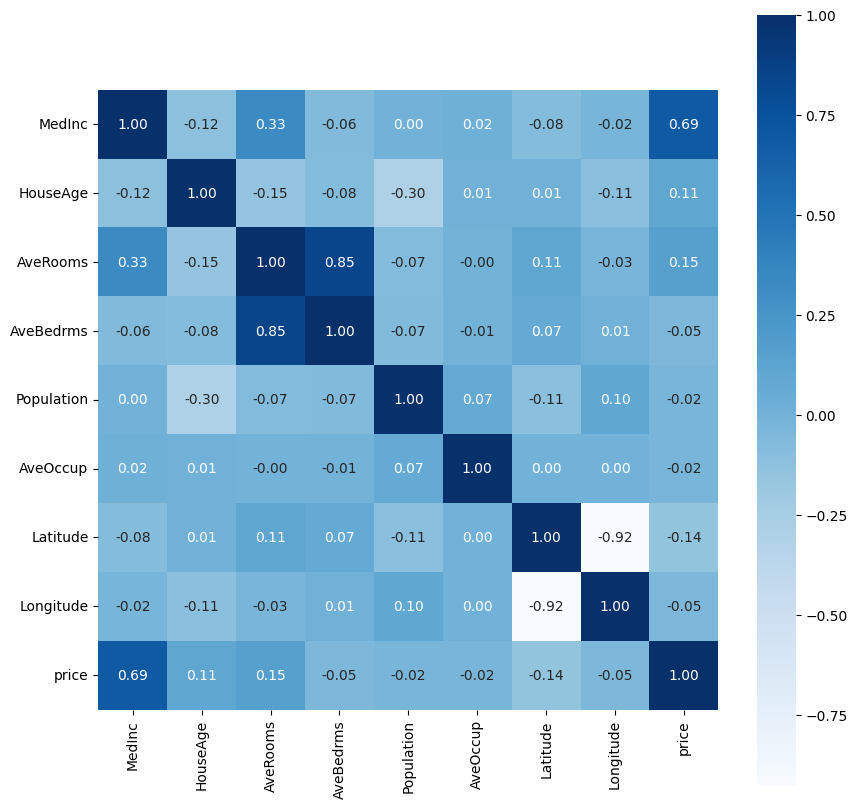

In [48]:
#constructing a heapmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True, square=True , fmt='.2f',annot=True , annot_kws={'size':10},cmap='Blues')

splitting the dat and target(price)

In [50]:
x = house_price_dataframe.drop(['price'],axis=1)
y = house_price_dataframe['price']

In [51]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

splitting the data into Training data and Test data

In [53]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 2)      # 0.2 => 20% of the data is test data and 80% of the data is for training

In [55]:
print(x.shape,x_train.shape,x_test.shape)
#rows , col

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [56]:
#loading the model
model = XGBRegressor()


In [57]:
#training the model with X_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [67]:
#accuracy for prediction training data
training_data_prediction = model.predict(x_train)

In [68]:
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [69]:
#R squared error
score_1= metrics.r2_score(y_train, training_data_prediction)

#mean Absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error: ", score_1 )
print("Mean absolute error: ", score_2)


R squared error:  0.9451221492760822
Mean absolute error:  0.1919170860794262


Visualizing the actual Prices and predicted prices

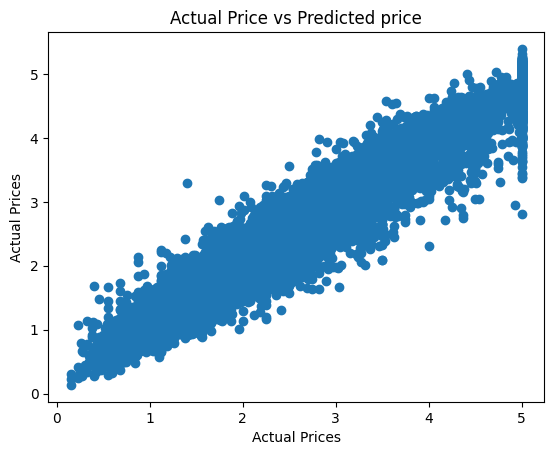

In [76]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Actual Prices")
plt.title("Actual Price vs Predicted price")
plt.show()

Prediction on Test dataset

In [71]:
#accuracy for prediction test data
test_data_prediction = model.predict(x_test)

In [72]:
print(test_data_prediction)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [73]:
#R squared error
score_1= metrics.r2_score(y_test, test_data_prediction)

#mean Absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error: ", score_1 )
print("Mean absolute error: ", score_2)


R squared error:  0.8412904408180302
Mean absolute error:  0.30753655785801337


Visualizing on the Test data

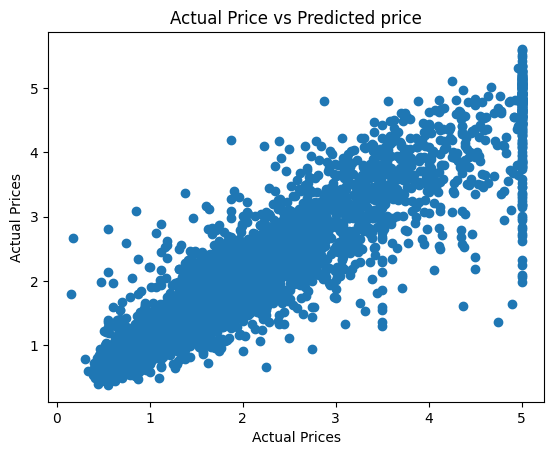

In [77]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Actual Prices")
plt.title("Actual Price vs Predicted price")
plt.show()